In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.1 텐서와 Autograd

## 3.1.1 텐서의 차원 자유자재로 다루기

In [1]:
import torch

In [2]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
print("Size", x.size())
print("shape", x.shape)
print("랭크(차원)", x.ndimension())

Size torch.Size([3, 3])
shape torch.Size([3, 3])
랭크(차원) 2


In [4]:
#랭크 늘리기
x=torch.unsqueeze(x,0)
print(x)
print("Size", x.size())
print("shape", x.shape)
print("랭크(차원)", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size torch.Size([1, 3, 3])
shape torch.Size([1, 3, 3])
랭크(차원) 3


In [5]:
x=torch.squeeze(x)
print(x)
print("Size", x.size())
print("shape", x.shape)
print("랭크(차원)", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size torch.Size([3, 3])
shape torch.Size([3, 3])
랭크(차원) 2


In [6]:
x=x.view(9)
print(x)
print("Size", x.size())
print("shape", x.shape)
print("랭크(차원)", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size torch.Size([9])
shape torch.Size([9])
랭크(차원) 1


## 3.1.2 텐서를 이용한 연산과 행렬곱

In [7]:
w=torch.randn(5,3, dtype=torch.float)
x=torch.tensor([[1.0, 2.0],[3.0, 4.0],[5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w: ", w)
print("x: ", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w:  tensor([[ 1.7984, -0.2027, -0.2120],
        [ 2.5471, -0.3359, -1.0173],
        [ 0.1949, -0.8637, -0.8013],
        [ 0.5067,  0.8752, -0.3442],
        [ 0.1806, -0.9201, -0.3628]])
x:  tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [8]:
b=torch.randn(5,2, dtype=torch.float)
print("b size : ", b.size())
print("b:", b)

b size :  torch.Size([5, 2])
b: tensor([[ 0.5284, -0.2749],
        [-1.2045,  0.5034],
        [-2.4473, -1.0631],
        [ 0.3635, -0.1699],
        [-1.1512, -1.3101]])


In [9]:
wx=torch.mm(w,x)
print("Wx size : ", wx.size())
print("wx : ", wx)

Wx size :  torch.Size([5, 2])
wx :  tensor([[ 0.1304,  1.5142],
        [-3.5473, -2.3535],
        [-6.4029, -7.8730],
        [ 1.4114,  2.4490],
        [-4.3936, -5.4958]])


In [10]:
result=wx+b
print("result size : ", result.size())
print("result : ", result)

result size :  torch.Size([5, 2])
result :  tensor([[ 0.6589,  1.2393],
        [-4.7519, -1.8501],
        [-8.8502, -8.9361],
        [ 1.7749,  2.2792],
        [-5.5448, -6.8059]])


## 3.1.3 Autograd

In [11]:
w=torch.tensor(1.0, requires_grad=True)

In [12]:
a=w*3

In [14]:
l=a**2

In [15]:
l.backward()
print('l를 w로 미분한 값은 {}'.format(w.grad))

l를 w로 미분한 값은 18.0


# 3.2 경사하강법으로 이미지 복원하기

1. weird_function() 함수의 소스코드 분석

2. 분석을 토대로 weird_function() 함수의 동작을 반대로 이행하는 함수를 구현한다.

3. 2에서 구현한 함수에 오염된 이미지를 입력해서 복구된 이미지를 출력한다

1. 오염된 이미지(broken image) 와 크기가 같은 랜덤 텐서 (random_tensor) 를 생성한다.

2. 랜덤 텐서를 weird_function() 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.

    a. [사실] 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.

    b. [사실] 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.

3. 가설과 오염된 이미지가 같다면, 무작위 이미지가 원본 이미지도 원본 이미지도 같을 것이다.

4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [17]:
import torch
import pickle
import matplotlib.pyplot as plt

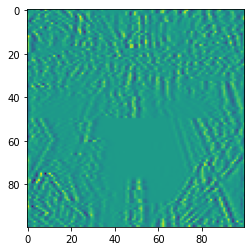

In [19]:
# [10000] 모양의 벡터
broken_image=torch.FloatTensor(pickle.load(open('/content/drive/MyDrive/3분 딥러닝 (파이토치편)/broken_image_t.p', 'rb'), encoding='latin1'))

#[100,100] 의 형태
plt.imshow(broken_image.view(100,100))

In [40]:
#이미지를 오염시키는 함수
def weird_function(x, n_iter=5):
    h=x
    filt=torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor=torch.tensor([1.0*0])
        h_l=torch.cat((zero_tensor, h[:-1]), 0)
        h_r=torch.cat((h[1:], zero_tensor), 0)
        h=filt[0]*h+filt[2]+h_l+filt[1]*h_r
        if i%2==0:
            h=torch.cat( (h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)

    return h

In [41]:
# 가설 텐서와 오염된 이미지의 오차 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [42]:
#무작위 텐서 생성
random_tensor=torch.randn(10000, dtype=torch.float)

In [43]:
lr=0.8

In [44]:
#경사하강법 구현
for i in range(0,20000):
    random_tensor.requires_grad_(True)

    hypothesis=weird_function(random_tensor)
    loss=distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():
        random_tensor=random_tensor-lr*random_tensor.grad

    if i%1000==0:
        print('Loss at {} = {} '.format(i, loss.item()))

Loss at 0 = 530.780517578125 
Loss at 1000 = 66.14334106445312 
Loss at 2000 = 66.14755249023438 
Loss at 3000 = 66.14908599853516 
Loss at 4000 = 66.14976501464844 
Loss at 5000 = 66.15035247802734 
Loss at 6000 = 66.15071105957031 
Loss at 7000 = 66.1513671875 
Loss at 8000 = 66.15215301513672 
Loss at 9000 = 66.15225982666016 
Loss at 10000 = 66.15219116210938 
Loss at 11000 = 66.15240478515625 
Loss at 12000 = 66.1519546508789 
Loss at 13000 = 66.15185546875 
Loss at 14000 = 66.15019989013672 
Loss at 15000 = 66.15106964111328 
Loss at 16000 = 66.15140533447266 
Loss at 17000 = 66.15162658691406 
Loss at 18000 = 66.152099609375 
Loss at 19000 = 66.15211486816406 


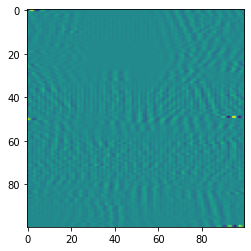

In [45]:
plt.imshow(random_tensor.view(100,100).data)

# 3.3 신경망 모델 구현하기

In [47]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [48]:
n_dim=2
x_train, y_train=make_blobs(n_samples=80, 
                            n_features=n_dim, 
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True,
                            cluster_std=0.3)

In [49]:
x_test, y_test=make_blobs(n_samples=20,
                          n_features=n_dim,
                          centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                          shuffle=True,
                          cluster_std=0.3)

0번이나 1번을 레이블로 가진 데이터는 전부 0번 레이블

2번이나 3번을 레이블로 가진 데이터는 전부 1번 레이블

In [50]:
def label_map(y_, from_, to_):
    y=numpy.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

In [51]:
y_train=label_map(y_train, [0,1], 0)
y_train=label_map(y_train, [2,3], 1)
y_test=label_map(y_test, [0,1], 0)
y_test=label_map(y_test, [2,3], 1)

In [56]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x,y):
        # 0이면
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        #1이면
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_==0 else c+'+')

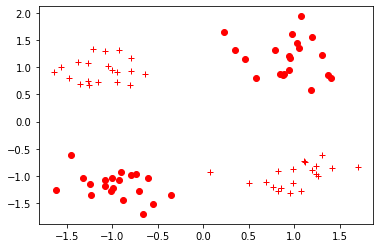

In [57]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [58]:
# 넘파이 벡터 형식 데이터를 파이토치 텐서로 바꿔준다.
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)

데이터를 준비했으니 본격적으로 신경망 모델 구현

파이토치에서 신경망은 신경망 모듈(nn.Module) 을 상속받는 파이썬 클래스로 정의

nn.Module를 상속받으면 파이토치 프레임워크에 있는 각종 도구를 쉽게 적용 가능

In [64]:
class NeuralNet(torch.nn.Module):
    #신경망의 구조와 동작을 정의하는 생성자를 모델 클래스에 정의
    #__init__() 함수는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출
    #super() 함수를 부르면 우리가 만든 NeuralNet 클래스는 파이토치의 nn.Module 클래스의 속성들을 가지고 초기화
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        
        self.linear_1=torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu=torch.nn.ReLU()
        self.linear_2=torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid=torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1=self.linear_1(input_tensor)
        relu=self.relu(linear1)
        linear2=self.linear_2(relu)
        output=self.sigmoid(linear2)
        return output

In [65]:
model=NeuralNet(2,5)
learning_rate=0.03
criterion=torch.nn.BCELoss() #이진 교차 엔트로피

In [66]:
epochs=2000

In [67]:
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [68]:
model.eval()
test_loss_before=criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7660686373710632


In [69]:
#신경망 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() #새로운 경삿값을 0으로 설정
    train_output=model(x_train)
    train_loss=criterion(train_output.squeeze(), y_train)
    if epoch%100==0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    
    #역전파
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7642284631729126
Train loss at 100 is 0.6604010462760925
Train loss at 200 is 0.6151770949363708
Train loss at 300 is 0.5699829459190369
Train loss at 400 is 0.5302003026008606
Train loss at 500 is 0.4921742081642151
Train loss at 600 is 0.4513402581214905
Train loss at 700 is 0.40878695249557495
Train loss at 800 is 0.3680911958217621
Train loss at 900 is 0.3304286599159241
Train loss at 1000 is 0.2965828776359558
Train loss at 1100 is 0.26680371165275574
Train loss at 1200 is 0.2409936934709549
Train loss at 1300 is 0.21887800097465515
Train loss at 1400 is 0.20000925660133362
Train loss at 1500 is 0.18391993641853333
Train loss at 1600 is 0.17016948759555817
Train loss at 1700 is 0.1583767831325531
Train loss at 1800 is 0.1482081264257431
Train loss at 1900 is 0.1393839567899704


In [71]:
model.eval()
test_loss_before=criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss_before.item()))

After Training, test loss is 0.12433717399835587


In [74]:
#가중치를 담은 모델 저장
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model : {}'.format(model.state_dict()))

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[ 0.2907,  0.0187],
        [ 1.7183, -1.4533],
        [ 1.0662, -0.9166],
        [ 1.4288, -1.2054],
        [ 1.2041, -0.9688]])), ('linear_1.bias', tensor([-0.6496, -0.2630, -0.1493, -0.2781,  2.0777])), ('linear_2.weight', tensor([[-0.3063,  2.1547,  1.2774,  1.7694, -2.4743]])), ('linear_2.bias', tensor([1.4737]))])


In [75]:
#모델을 가져와 가중치 입력
new_model=NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [76]:
new_model.eval()
print('벡터 [-1,1] 이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1] 이 레이블 1을 가질 확률은 0.8136131763458252
